## Dimensionality Reduction

In [3]:
#import packages
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA

In [53]:
df = pd.read_csv("flights_cleaned.csv")

In [54]:
df.columns

Index(['branded_code_share', 'crs_dep_time', 'crs_arr_time', 'arr_delay',
       'cancelled', 'crs_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'fl_month', 'fl_day_of_week', 'fl_type',
       'state_travel_type', 'origin_cat', 'dest_cat', 'mkt_op_combo_cat'],
      dtype='object')

In [59]:
columns = ['branded_code_share', 'crs_dep_time', 'crs_arr_time', 'arr_delay',
       'cancelled', 'crs_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'fl_month', 'fl_day_of_week', 'fl_type',
       'state_travel_type', 'origin_cat', 'dest_cat', 'mkt_op_combo_cat']

In [133]:
df = df[df.crs_elapsed_time.isna()==False]

### Part One: Complete PCA 

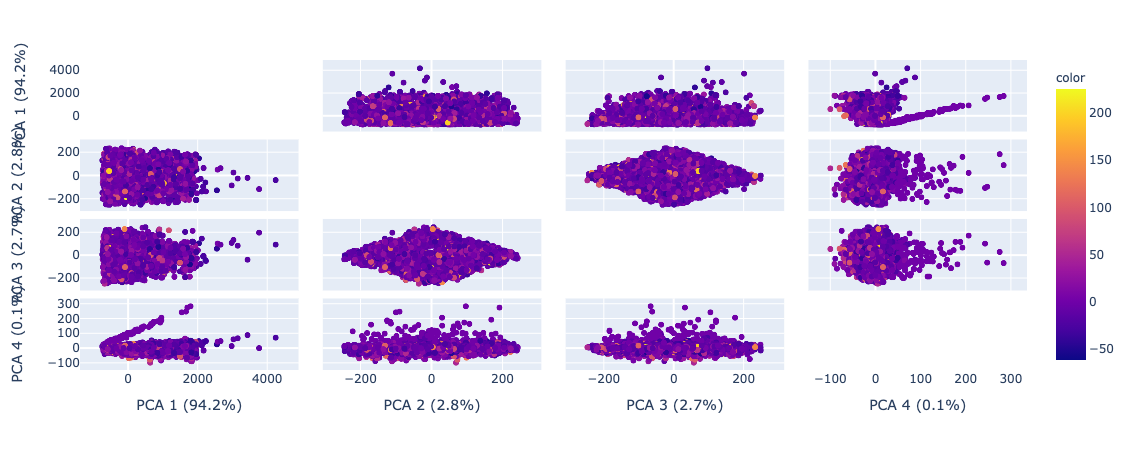

In [134]:
pca = PCA()
component = pca.fit_transform(df_samp[['branded_code_share', 'crs_dep_time', 'crs_arr_time', 
                                            'crs_elapsed_time', 'air_time', 'distance',
                                            'fl_month', 'fl_day_of_week', 'fl_type',
                                            'state_travel_type', 'origin_cat', 'dest_cat', 'mkt_op_combo_cat']])
labels = {
    str(i): f"PCA {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ *100)
}

fig = px.scatter_matrix(
    component,
    labels=labels,
    dimensions=range(4),
    color = df_samp.arr_delay
)
fig.update_traces(diagonal_visible=False)
fig.show()

### Part Two : Get Most Important Features

In [135]:
# number of components
n_pcs= pca.components_.shape[0]

In [136]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [137]:
initial_feature_names = ['branded_code_share', 'crs_dep_time', 'crs_arr_time', 
                                            'crs_elapsed_time', 'air_time', 'distance',
                                            'fl_month', 'fl_day_of_week', 'fl_type',
                                            'state_travel_type', 'origin_cat', 'dest_cat', 'mkt_op_combo_cat']

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
Components = pd.DataFrame(dic.items())

In [138]:
Components

,0,1
0,PC0,distance
1,PC1,origin_cat
2,PC2,dest_cat
3,PC3,air_time
4,PC4,mkt_op_combo_cat
5,PC5,crs_elapsed_time
6,PC6,crs_arr_time
7,PC7,fl_month
8,PC8,crs_dep_time
9,PC9,fl_day_of_week


### Part Three : Determine Explained Variance

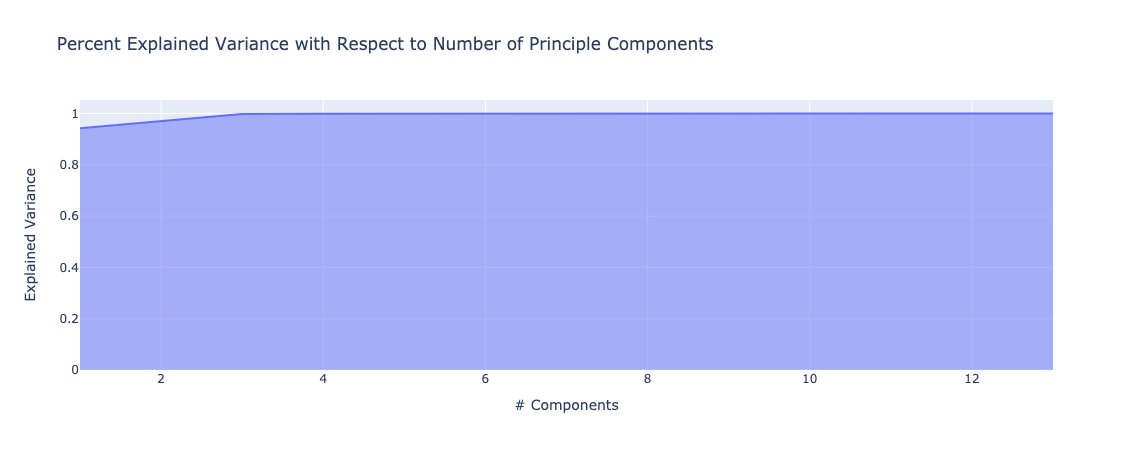

In [139]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    title = "Percent Explained Variance with Respect to Number of Principle Components",
    labels={"x": "# Components", "y": "Explained Variance"}
)

### Part 4 : Selecting Components for Dimension Reduction

In [140]:
#using n_components = 3
pca = PCA(n_components=3)
component = pca.fit_transform(df_samp[['branded_code_share', 'crs_dep_time', 'crs_arr_time', 
                                            'crs_elapsed_time', 'air_time', 'distance',
                                            'fl_month', 'fl_day_of_week', 'fl_type',
                                            'state_travel_type', 'origin_cat', 'dest_cat', 'mkt_op_combo_cat']])
w_transpose = np.transpose(pca.components_)
data_values = df_reduced.values
reduced_feat = np.matmul(data_values, w_transpose)

In [141]:
principalDf = pd.DataFrame(data = reduced_feat
             , columns = ['pc1', 'pc2', 'pc3'])

In [142]:
yDF = df[['arr_delay','cancelled','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay']]

In [143]:
yDF.shape

(15768083, 7)

In [144]:
principalDf.shape

(15768083, 3)

In [146]:
PCA_df = principalDf.merge(yDF, right_index=True, left_index=True)

In [148]:
PCA_df.to_csv("flights_pca.csv", index=False)